# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [5]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
## 超參數設定
"""
Set your required experiment parameters
"""
EPOCHS = 50
BATCH_SIZE = 256
LEARNING_RATE = [1e-3,1e-4]
EPOCHS = 50

In [22]:
def get_optimizer(optimizer_name):
    OPTIMIZERS = {"SGD":keras.optimizers.SGD(lr=lr),
                  "RMSprop":keras.optimizers.RMSprop(lr=lr),
                  "AdaGrad":keras.optimizers.Adagrad(lr=lr),
                  "Adam":keras.optimizers.Adam(lr=lr)}
    return OPTIMIZERS.get(optimizer_name)
    
    

In [24]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    optimizer_names = ["SGD","RMSprop","AdaGrad","Adam"]
    for optimizer_name in optimizer_names:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with lr = %f , optimizer=%s" % (lr,optimizer_name))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        #optimizer = keras.optimizers.SGD(lr=lr)
        optimizer = get_optimizer(optimizer_name)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "lr: %f optimizer: %s" % (lr,optimizer_name)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}



Experiment with lr = 0.001000 , optimizer=SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.2168 - acc: 0.2187 - val_loss: 1.9561 - val_acc: 0.2653
Epoch 2/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8830 - acc: 0.3179 - val_loss: 1.7903 - val_acc: 0.3435
Epoch 3/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.7862 - acc: 0.3575 - val_loss: 1.8090 - val_acc: 0.3394
Epoch 4/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.7123 - acc: 0.3844 - val_loss: 1.8182 - val_acc: 0.3314
Epoch 5/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.6618 - acc: 0.4068 - val_loss: 1.6950 - val_acc: 0.3957
Epoch 6/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.6175 - acc: 0.4221 - val_loss: 1.7015 - val_acc: 0.3999
Epoch 7/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5741 - acc: 0.4380 - val_loss: 1.7560 - val_acc

50000/50000 [==============================] - 4s 75us/step - loss: 1.9972 - acc: 0.2823 - val_loss: 1.9035 - val_acc: 0.3394
Epoch 2/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.8041 - acc: 0.3610 - val_loss: 1.8199 - val_acc: 0.3541
Epoch 3/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.7278 - acc: 0.3909 - val_loss: 1.7335 - val_acc: 0.3823
Epoch 4/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6792 - acc: 0.4080 - val_loss: 1.6708 - val_acc: 0.4036
Epoch 5/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6389 - acc: 0.4233 - val_loss: 1.6890 - val_acc: 0.3952
Epoch 6/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6119 - acc: 0.4326 - val_loss: 1.6305 - val_acc: 0.4165
Epoch 7/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.5863 - acc: 0.4436 - val_loss: 1.5987 - val_acc: 0.4382
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 4s 74us/step - loss: 1.7106 - acc: 0.3880 - val_loss: 1.6831 - val_acc: 0.3950
Epoch 3/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6174 - acc: 0.4251 - val_loss: 1.5872 - val_acc: 0.4358
Epoch 4/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5523 - acc: 0.4485 - val_loss: 1.5282 - val_acc: 0.4606
Epoch 5/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.4977 - acc: 0.4673 - val_loss: 1.5088 - val_acc: 0.4599
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.4633 - acc: 0.4802 - val_loss: 1.4804 - val_acc: 0.4684
Epoch 7/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.4251 - acc: 0.4928 - val_loss: 1.4835 - val_acc: 0.4622
Epoch 8/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.3978 - acc: 0.5032 - val_loss: 1.4738 - val_acc: 0.4858
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 62us/step - loss: 2.2949 - acc: 0.1302 - val_loss: 2.2865 - val_acc: 0.1416
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.2833 - acc: 0.1518 - val_loss: 2.2764 - val_acc: 0.1597
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.2739 - acc: 0.1654 - val_loss: 2.2678 - val_acc: 0.1679
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.2656 - acc: 0.1736 - val_loss: 2.2600 - val_acc: 0.1775
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.2579 - acc: 0.1814 - val_loss: 2.2525 - val_acc: 0.1836
Epoch 8/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.2505 - acc: 0.1866 - val_loss: 2.2453 - val_acc: 0.1887
Epoch 9/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.2434 - acc: 0.1928 - val_loss: 2.2384 - val_acc: 0.1942
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 3s 69us/step - loss: 1.6564 - acc: 0.4111 - val_loss: 1.7492 - val_acc: 0.3774
Epoch 5/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.6134 - acc: 0.4276 - val_loss: 1.6730 - val_acc: 0.3929
Epoch 6/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.5785 - acc: 0.4421 - val_loss: 1.5949 - val_acc: 0.4271
Epoch 7/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.5444 - acc: 0.4550 - val_loss: 1.5642 - val_acc: 0.4317
Epoch 8/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.5170 - acc: 0.4631 - val_loss: 1.5875 - val_acc: 0.4312
Epoch 9/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.4901 - acc: 0.4751 - val_loss: 1.6179 - val_acc: 0.4346
Epoch 10/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.4651 - acc: 0.4835 - val_loss: 1.5559 - val_acc: 0.4407
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 3s 67us/step - loss: 1.8377 - acc: 0.3605 - val_loss: 1.8367 - val_acc: 0.3642
Epoch 6/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.8237 - acc: 0.3649 - val_loss: 1.8207 - val_acc: 0.3671
Epoch 7/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.8113 - acc: 0.3688 - val_loss: 1.8098 - val_acc: 0.3692
Epoch 8/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8009 - acc: 0.3729 - val_loss: 1.8011 - val_acc: 0.3701
Epoch 9/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.7920 - acc: 0.3760 - val_loss: 1.7944 - val_acc: 0.3727
Epoch 10/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.7838 - acc: 0.3792 - val_loss: 1.7849 - val_acc: 0.3794
Epoch 11/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.7767 - acc: 0.3814 - val_loss: 1.7782 - val_acc: 0.3796
Epoch 12/50
50000/50000 [=========================

50000/50000 [==============================] - 4s 75us/step - loss: 1.4891 - acc: 0.4758 - val_loss: 1.4933 - val_acc: 0.4696
Epoch 7/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.4640 - acc: 0.4834 - val_loss: 1.4816 - val_acc: 0.4723
Epoch 8/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.4295 - acc: 0.4985 - val_loss: 1.4793 - val_acc: 0.4717
Epoch 9/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.4018 - acc: 0.5062 - val_loss: 1.4534 - val_acc: 0.4835
Epoch 10/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.3846 - acc: 0.5118 - val_loss: 1.4383 - val_acc: 0.4841
Epoch 11/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.3587 - acc: 0.5241 - val_loss: 1.4159 - val_acc: 0.4938
Epoch 12/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.3360 - acc: 0.5310 - val_loss: 1.3795 - val_acc: 0.5099
Epoch 13/50
50000/50000 [========================

In [29]:
import pickle
f = open('results.bak', 'wb')
pickle.dump(results, f)

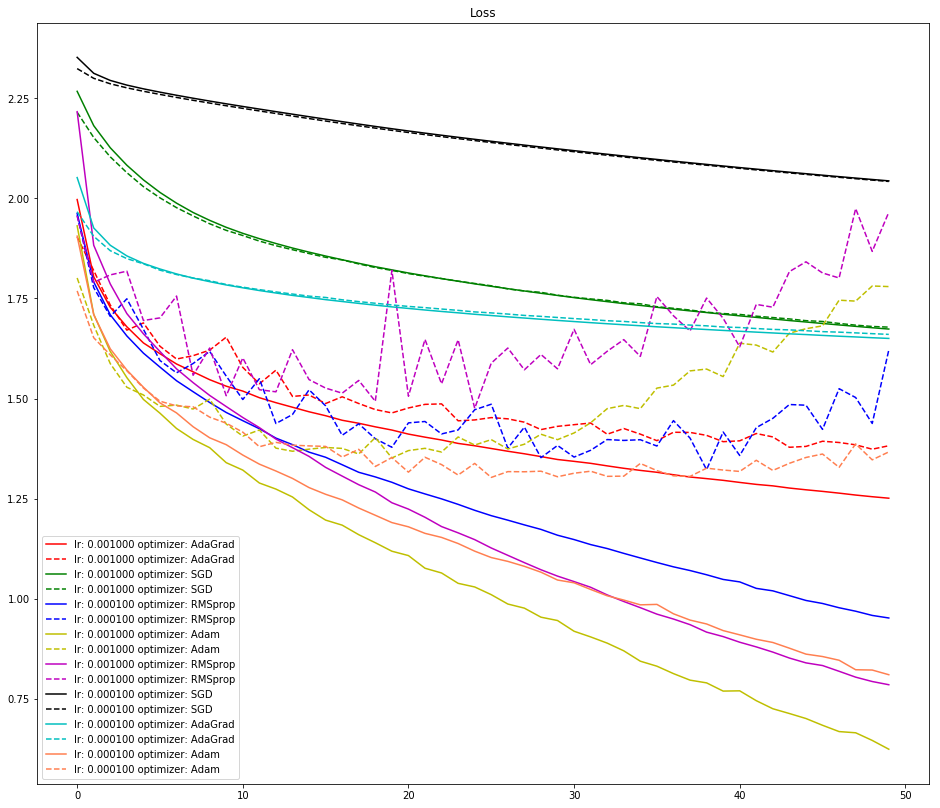

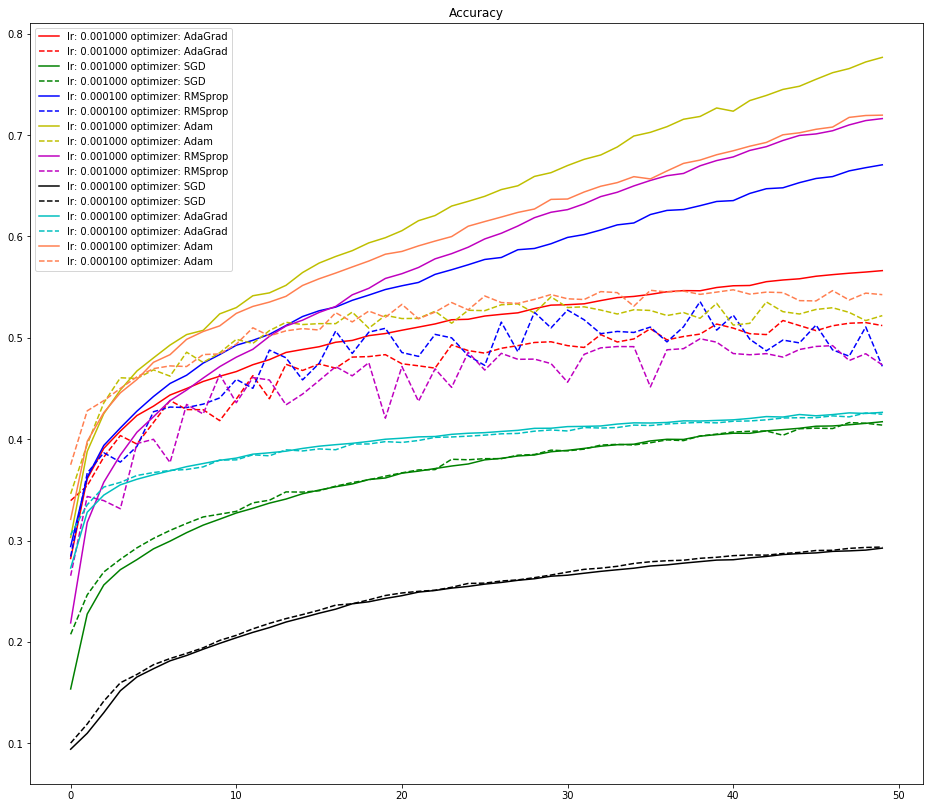

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
